In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from linear_regression import LinearRegression
from gradient_descent import GradientDescent, quad, quadGrad
%matplotlib inline

--Ridge Regression Statistics--
w_ridge = [ 1.41110495  0.3547736 ]
SSE_train = 14.6572814207
SSE_validate = 13.9529873179
SSE_test = 17.6287593958


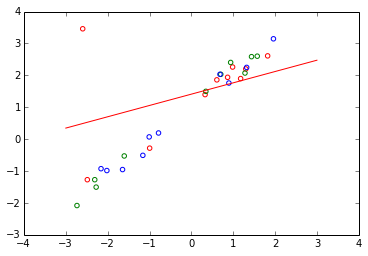

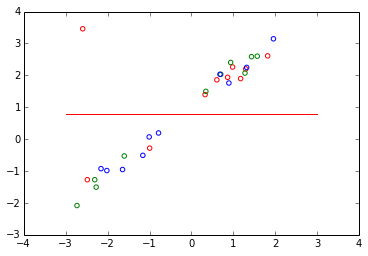

 
-------------
M = 0
argmin lambda = 10.0
SSE_train = 23.8531121405
SSE_val = 21.9236360118
SSE_test = 32.3215991805
----------------
 


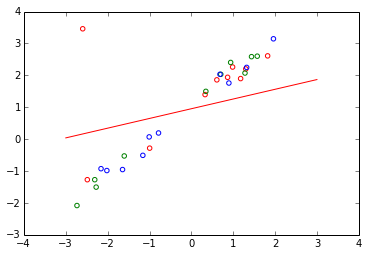

 
-------------
M = 1
argmin lambda = 6.53266331658
SSE_train = 18.3617212364
SSE_val = 11.4438516334
SSE_test = 16.8939598372
----------------
 


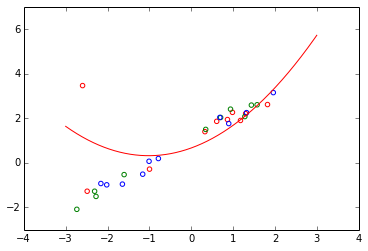

 
-------------
M = 2
argmin lambda = 1.80904522613
SSE_train = 12.4138336947
SSE_val = 8.91996688239
SSE_test = 24.1285791444
----------------
 


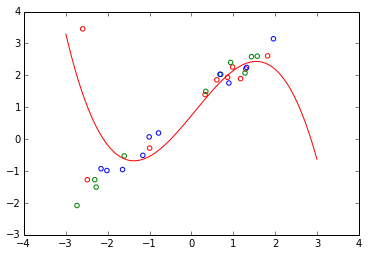

 
-------------
M = 3
argmin lambda = 0.100502512563
SSE_train = 9.83773289738
SSE_val = 3.60078310093
SSE_test = 23.5464243116
----------------
 


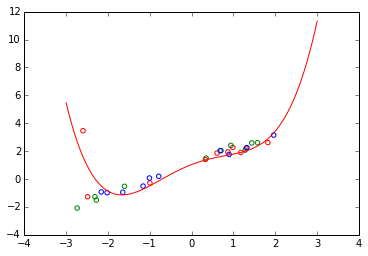

 
-------------
M = 4
argmin lambda = 0.854271356784
SSE_train = 8.70102995515
SSE_val = 0.987786480892
SSE_test = 27.4763457011
----------------
 


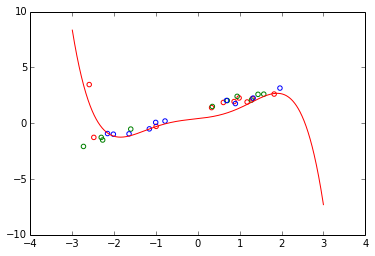

 
-------------
M = 5
argmin lambda = 8.94472361809
SSE_train = 10.379397931
SSE_val = 2.19305884364
SSE_test = 36.47314725
----------------
 


In [122]:

def plot(lr,w, plot_sin=True, plot_test=False, plot_validate=False):
    # plot sin(2*phi*x) in green
    x_min = np.amin(lr.x)
    x_max = np.amax(lr.x)
    x = np.linspace(-3,3,1000)
    M = lr.numFeatures - 1
    sin_x = np.sin(2*np.pi*x)
    lr_temp = LinearRegression(x,x,lr.numFeatures-1)
    reg_prediction = np.dot(lr_temp.phi,w)
    
    lr_validate = LinearRegression.fromFile(validate_filename, M)
    lr_test = LinearRegression.fromFile(test_filename, M)
    
    
    if plot_sin:
        plt.plot(x,sin_x, color='g')
        
    plt.plot(x, reg_prediction, color='r')
    
    # the training set is plotted in blue
    plt.scatter(lr.x, lr.y, color='r', marker='o',facecolors='none')
    
    # test set plotted in green
    if plot_test:
        plt.scatter(lr_test.x, lr_test.y, color='g', marker='o',facecolors='none')
        
    # validation set plotted in orange
    if plot_test:
        plt.scatter(lr_validate.x, lr_validate.y, color='b', marker='o',facecolors='none')
        
        
    plt.show()
    
def plotRidge(M,lam):
    lr = LinearRegression.fromFile(filename, M)
    w_ridge = lr.ridge(lam)
    sse = lr.SSE(w_ridge)
    plot(lr,w_ridge)
    print " "
    print "--Ridge Regression Statistics--"
    print "w_ridge = " + str(w_ridge)
    print "SSE = " + str(sse) 
    

def computeRidge(M, lam, train, test, validate, verbose=True):
    lr_train = LinearRegression.fromFile(train, M)
    lr_validate = LinearRegression.fromFile(validate, M)
    lr_test = LinearRegression.fromFile(test, M)
    
    w_ridge = lr_train.ridge(lam)
    sse_train = lr_train.SSE(w_ridge)
    sse_test = lr_test.SSE(w_ridge)
    sse_validate = lr_validate.SSE(w_ridge)
    
    if verbose:
        print "--Ridge Regression Statistics--"
        print "w_ridge = " + str(w_ridge)
        print "SSE_train = " + str(sse_train)
        print "SSE_validate = " + str(sse_validate)
        print "SSE_test = " + str(sse_test)

        plot(lr_train, w_ridge, plot_sin=False, plot_test=True, plot_validate=True)
    
    return (sse_validate, sse_test, sse_train)

def modelSelection(M, showPlot=False):
    sseVal = lambda x: computeRidge(M, x, train_filename, test_filename, validate_filename, verbose=False)[0]
    sseTest = lambda x: computeRidge(M, x, train_filename, test_filename, validate_filename, verbose=False)[1]
    sseTrain = lambda x: computeRidge(M, x, train_filename, test_filename, validate_filename, verbose=False)[2]
    
    sseVal_vec = np.vectorize(sseVal)
    sseTest_vec = np.vectorize(sseTest)
    sseTrain_vec = np.vectorize(sseTrain)
    
    lam_vec = np.linspace(0,10,200)
    a = sseVal_vec(lam_vec)
    b = sseTest_vec(lam_vec)
    c = sseTrain_vec(lam_vec)
    
    lam_min_idx = np.argmin(a)
    lam_min = lam_vec[lam_min_idx]
    
    lr_train = lr_train = LinearRegression.fromFile(train_filename, M)
    w_ridge = lr_train.ridge(lam_min)
    

    if showPlot:
#         plt.plot(lam_vec, a, color='b')
#         plt.plot(lam_vec, b, color='g')
        plot(lr_train, w_ridge, plot_sin=False, plot_test=True, plot_validate=True)
        plt.show()
        
    print " "
    print "-------------"
    print "M = " + str(M)
    print "argmin lambda = " + str(lam_min)
    print "SSE_train = " + str(c[lam_min_idx])
    print "SSE_val = " + str(a[lam_min_idx])
    print "SSE_test = " + str(b[lam_min_idx])
    print "----------------"
    print " "
    
    


    
filename = "curvefitting.txt"
test_filename = "regress_test.txt"
train_filename = "regress_train.txt"
validate_filename = "regress_validate.txt"
M = 1
lam =1.14
# plotRidge(M, lam)
computeRidge(M, lam, train_filename, test_filename, validate_filename, verbose=True)

# sseVal = lambda x: computeRidge(M, x, train_filename, test_filename, validate_filename, verbose=False)[0]
# sseTest = lambda x: computeRidge(M, x, train_filename, test_filename, validate_filename, verbose=False)[1]

# sseVal_vec = np.vectorize(sseVal)
# sseTest_vec = np.vectorize(sseTest)

# lam_vec = np.linspace(0,10,100)
# a = sseVal_vec(lam_vec)
# b = sseTest_vec(lam_vec)

# plt.plot(lam_vec, a, color='b')
# plt.plot(lam_vec, b, color='g')

for m in range(0,6):
    modelSelection(m, showPlot=True)
    

  

sseVal_vec(np.array([1,2]))

In [97]:
x = np.linspace(0,0.5,2)
sseVal_vec(x)

array([ 22.86073161,  23.19489825])